In [2]:
import torch, imageio
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import Dataset
from tqdm import tqdm
import time
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import os, random
import torch.nn as nn

In [3]:
# Question1 Loading the data
data_dir = 'train_val/images'
data_dir1 = 'train_val/masks'
jpg_filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.jpg']
bmp_filenames = [name for name in os.listdir(data_dir1) if os.path.splitext(name)[-1] == '.bmp']
filenames = jpg_filenames+bmp_filenames
bmp_fileList, jpg_fileList = [], []
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename)) if os.path.splitext(filename)[-1] == '.jpg' else imageio.imread(os.path.join(data_dir1, filename)) 
    img_t = torch.from_numpy(img_arr)
    
    
    jpg_fileList.append(img_t) if os.path.splitext(filename)[-1] == '.jpg' else bmp_fileList.append(img_t)

# jpg_rand_random.sample(jpg_fileList, 5)
print(jpg_fileList)
print(bmp_fileList)

[tensor([[[ 76, 160, 246],
         [ 80, 164, 250],
         [ 81, 165, 251],
         ...,
         [121, 207, 255],
         [119, 205, 255],
         [118, 204, 255]],

        [[ 73, 157, 243],
         [ 77, 161, 247],
         [ 80, 166, 251],
         ...,
         [119, 205, 255],
         [117, 203, 254],
         [116, 202, 253]],

        [[ 68, 154, 239],
         [ 73, 159, 244],
         [ 76, 165, 249],
         ...,
         [116, 204, 254],
         [114, 202, 252],
         [114, 202, 252]],

        ...,

        [[ 12, 143, 189],
         [  4, 135, 181],
         [  0, 131, 176],
         ...,
         [  0,  12,  28],
         [  0,  12,  28],
         [  0,  12,  28]],

        [[  9, 135, 183],
         [  3, 131, 178],
         [  3, 131, 178],
         ...,
         [  0,  12,  28],
         [  0,  12,  28],
         [  0,  12,  28]],

        [[ 16, 141, 187],
         [  7, 132, 178],
         [  0, 126, 171],
         ...,
         [  0,  12,  28],
       

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



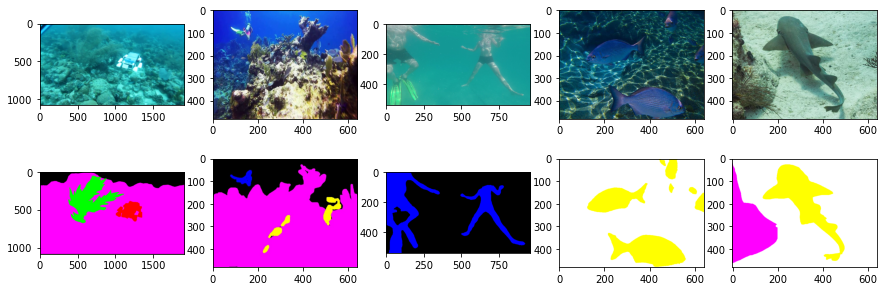

In [4]:
# Visualize the data
all_pairs = list(zip(jpg_fileList, bmp_fileList))
column = 5
pairs = random.sample(all_pairs,column)
# A1, B1 = zip(*pairs)
fig = plt.figure(figsize=[15,5]) 

for i, files in enumerate(pairs):
    plt.subplot(2,column, i+1)
    plt.imshow(files[0])
    
#     plt.show() 
    plt.subplot(2, column, i+column+1)
    plt.imshow(files[1])
    
#     plt.show() 

In [5]:
# Question2a Data preprossing(a)
max_height = 572
max_width = 572
img_dataset=[]
mask_dataset=[]

def Img_sizing(img):
    channel, height, width=tuple(img.size())
    if width > max_width:
        
        left = int((width-max_width)/2)
        right = int((width+max_width)/2)
        img = img[:, :, left:right]
    else:
        pad=(int((max_width-width)/2), int((max_width-width)/2), 0,  0)
        img = F.pad(img,pad,"constant",0)
    if height > max_height:
        top = int((height-max_height)/2)
        bottom = int((height+max_height)/2)
        img = img[:, top:bottom, :]
    else:
        pad=( 0,0,int((max_height-height)/2),int((max_height-height)/2))
        img = F.pad(img, pad,"constant",0)
    
    return img
for i, img in enumerate(all_pairs):
    jpg_img, bmp_img = img[0].permute(2, 0, 1), img[1].permute(2, 0, 1)
    jpg_size = list(jpg_img.size())
    jpg_img = Img_sizing(jpg_img)
    bmp_img = Img_sizing(bmp_img)
    print(jpg_img.shape , bmp_img.shape)
    img_dataset.append(jpg_img)
    mask_dataset.append(bmp_img)

    
    

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 571, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 571, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 571, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 571, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 571, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([3, 572, 572]) torch.Size([3, 572, 572])
torch.Size([

In [6]:
# Question2b Data preprossing(b)
VOC_COLORMAP=[
    [0,0,0],[0,0,255],[0,255,0],[0,255,255],[255,0,0],[255,0,255],[255,255,0],[255,255,255]
]

VOC_CLASSES=[
    'Background(waterboby)','Human drivers','Aquatic plants and sea grass'
    ,'wrecks or ruins','Robots','Reefs and invertebrates','fish and vertebrates'
    ,'sea floor and rocks'
]

def process_mask(rgb_mask,colormap):
    output_mask=[]
    rgb_mask=rgb_mask.permute(1,2,0)
    for i,color in enumerate(colormap):
        for j in range(572):
            for k in range(572):
                cmap=torch.all(np.equal(rgb_mask[j,k,:],color))
                #imageio.imwrite('./output/{i}.jpg',m*255)
                #print(cmap)
                output_mask.append(cmap)
    return output_mask


In [7]:
a=process_mask(mask_dataset[3],torch.from_numpy(np.array(VOC_COLORMAP)))

In [8]:
a=np.array(a)
a=a.reshape(8,572,572)
# print(a)

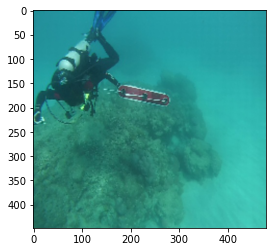

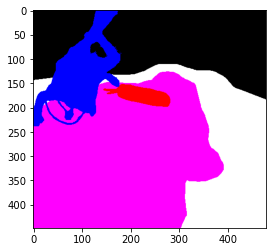

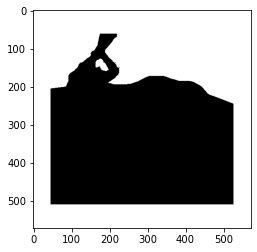

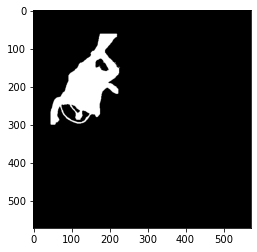

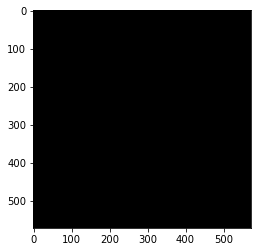

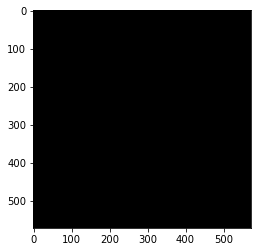

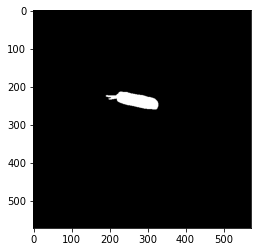

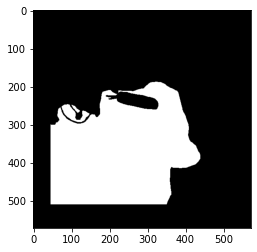

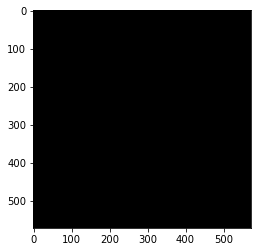

In [9]:
plt.imshow(jpg_fileList[3])
plt.show()
plt.imshow(bmp_fileList[3])
plt.show()
plt.imshow(a[1]*255)
for i in range(7):
    plt.imshow(a[i],cmap='gray')
    plt.show()

In [10]:
#Question3 Splitting to train and validation data in the ratio 8:2
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(img_dataset,mask_dataset, test_size = 0.20, random_state = 0)

In [12]:
print(len(X_train),len(y_train))

1220 1220


In [13]:
class MyDataset1(Dataset):
    def __init__(self, X_train, y_train, transform=None):
        self.data = X_train
        self.targets = y_train
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.X_train[index]
        y = self.y_train[index]
        
        if self.transform:
            x = X_train
            x = self.transform(x)
            y = self.transforms(y_train)

        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [14]:
data = X_train
targets = y_train

transform = transforms.Compose([transforms.ToTensor()])
dataset = MyDataset1(data, targets, transform=transform)
train_dataloader = DataLoader(dataset, batch_size=10, shuffle=True, num_workers=4)
# print(train_dataloader)

In [15]:
class MyDataset2(Dataset):
    def __init__(self, X_val, y_val, transform=None):
        self.data = X_val
        self.targets = y_val
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.X_val[index]
        y = self.y_val[index]
        
        if self.transform:
            x = X_val
            x = self.transform(x)
            y = self.transforms(y_val)

        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [16]:
data = X_val
targets = y_val

transform = transforms.Compose([transforms.ToTensor()])
dataset = MyDataset2(data, targets, transform=transform)
val_dataloader = DataLoader(dataset, batch_size=5, shuffle=True, num_workers=4)
#print(val_dataloader)

In [17]:
print('No. of samples in train set: '+str(len(train_dataloader)))
print('No. of samples in val set: '+str(len(val_dataloader)))


No. of samples in train set: 122
No. of samples in val set: 61


In [18]:
#Question4 UNet model Architecture
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [19]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [20]:
model = UNet(1,2)
print(model)

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [21]:
#Question5 Training of the model
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
#criterion1 = nn.CrossEntropyLoss() 
#learning_rate1= 0.001
#optimizer1 = optim.Adam(net.parameters(), lr=learning_rate1) # ADAM 
num_epochs = 50

train_loss = []
train_acc = []

for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for data in tqdm(train_dataloader):
        
        inputs,labels = data[0].to(device),data[1].to(device)
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda()
            # Initializing model gradients to zero
            optimizer1.zero_grad() 
            # Data feed-forward through the network
            outputs1 = model(inputs)
            # Predicted class is the one with maximum probability
            preds1 = torch.argmax(outputs1,dim=1)
            # Finding the loss
            loss = criterion1(outputs1, labels)
            # Accumulating the loss for each batch
            running_loss += loss 
            # Accumulate number of correct predictions
            running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/1220
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

  0%|                                                                                          | 0/122 [01:46<?, ?it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "E:\software\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Raveena\AppData\Local\Temp/ipykernel_17992/3520463010.py", line 17, in <module>
    for data in tqdm(train_dataloader):
  File "E:\software\lib\site-packages\tqdm\std.py", line 1180, in __iter__
    for obj in iterable:
  File "E:\software\lib\site-packages\torch\utils\data\dataloader.py", line 359, in __iter__
    return self._get_iterator()
  File "E:\software\lib\site-packages\torch\utils\data\dataloader.py", line 305, in _get_iterator
    return _MultiProcessingDataLoaderIter(self)
  File "E:\software\lib\site-packages\torch\utils\data\dataloader.py", line 918, in __init__
    w.start()
  File "E:\software\lib\multiprocessing\process.py", line 121, in start
    self._popen = self._Popen(self)
  File "E:\software\lib\multiprocessing\context.py", line 224, in _Popen
    return _default

TypeError: object of type 'NoneType' has no len()

In [ ]:
def train(epoch):
    print('\nEpoch : %d'%epoch)
  
    model.train()

    running_loss=0
    correct=0
    total=0

    for data in tqdm(train_dataloader):
        inputs,labels=data[0].to(device),data[1].to(device)
        optimizer.zero_grad()
        outputs=model(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
      
    train_loss=running_loss/len(train_dataloader)
    accu=100.*correct/total
  
    train_accu.append(accu)
    train_losses.append(train_loss)
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

In [ ]:
eval_losses=[]
eval_accu=[]

def test(epoch):
    model.eval()

    running_loss=0
    correct=0
    total=0

    with torch.no_grad():
        for data in tqdm(test_dataloader):
            images,labels=data[0].to(device),data[1].to(device)
      
            outputs=model(images)

            loss= loss_fn(outputs,labels)
            running_loss+=loss.item()
      
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
  
    test_loss=running_loss/len(test_dataloader)
    accu=100.*correct/total

    eval_losses.append(test_loss)
    eval_accu.append(accu)

    print('Test Loss: %.3f | Accuracy: %.3f'%(test_loss,accu)) 

In [ ]:
epochs=5
for epoch in range(1,epochs+1): 
    train(epoch)
    test(epoch)

In [ ]:
#Question6 Plotting the curves  
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

In [ ]:
# Question7 Jupiter notebook is user friendly easy to operatade and Easy start-up and 
# I like some more features like Visualization display, Text editing, Easy to customize and 
# Extensions with custom magic commands, Interactive code and data exploration.